Alr exist


AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

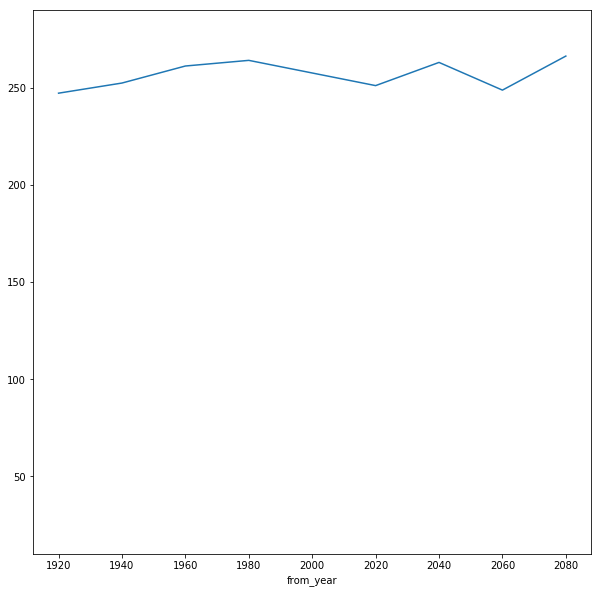

In [73]:
import csv
import os
import pandas as pd
from urllib.request import urlopen
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
l2=[]
l3=[]
def loadfn(country,climtype):
    #header=["GCM",climtype,"from year","to_year","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec","country"]
    start_year=1920
    link="http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/miub_echo_g/"+climtype+"/1920/1939/"+country+".csv"
    with open(r"C:\\Users\\Admin\\"+country+climtype+".csv","w",newline='') as write_file:
        #as in get_and_write_data function
            f = csv.writer(write_file)
            #f.writerow(i for i in header)
    write_file.close()
    response = urlopen(link)
    html = response.read().decode()
    with open("C:\\Users\\Admin\\"+country+climtype+".csv", "a",newline='') as write_file:
        #open the file / create it, newline ='' to prevent blank lines being written
        f = csv.writer(write_file)
        lines = html.strip().split("\n")
        for l in lines:
            if (l[0] =="#"):
                continue;
            elif l[0:10] in ["Not Availa", "There is n"]:
                continue
            else: #if doesn't have those it is data and so should be written
                l = l.split(",")
                #l.append(country)#it comes in as a String, so convert to a list for later easier writing and manipulation
                f.writerow(l)
           	#print ("Line Written")
        while(start_year!=2080):
            start_year=start_year+20
            link="http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/miub_echo_g/"+climtype+"/"+str(start_year)+"/"+str(start_year+19)+"/"+country+".csv"
            response = urlopen(link)
            html = response.read().decode()
            lines = html.strip().split("\n")
            for l in lines[1:]:
                    if l[0] =="#":
                        continue
                    elif l[0:10] in ["Not Availa", "There is n"]: #prevent it from writing lines  where no data is present (i.e. returns saying - "Not Available" or "There is no weather data available for the date provided. Past data is available from 1 July, 2008 onwards only.")
                        continue
                    elif l[15:17] in ["b1"]:
                        continue;
                    elif l[16:18] in ["b1"]:
                        continue;
                    else:
                        if ((l[15:17] in ["a2"]) or (l[16:18] in ["a2"])):
                            l=l.replace("a2,",'')
                        l = l.split(",")
                        #l.append(country)
                        #it comes in as a String, so convert to a list for later easier writing and manipulation
                        if(int(l[2])<1980 or int(l[2])>2020):
                            f.writerow(l)
                        elif(int(l[2])==1980):
                            l2=l
                            f.writerow(l)
                        elif(int(l[2])==2020):
                            l3=[l[0],l[1],"2000","2020"]
                            l3+=[str((float(x)+float(y))/2) for x,y in zip(l2[4:],l[4:])]
                            f.writerow(l3)
                            f.writerow(l)
                            
    write_file.close()
#flag=input('enter no. of countries to compare 1-4')
country="SLB"
typec="pr" #input('enter country code')
if(os.path.isfile('C:\\Users\\Admin\\'+country+typec+'.csv')):
    print("Alr exist")
else:
    loadfn(country,typec)
    
#with open("C:\\Users\\Admin\\"+country+".csv", "r",newline='') as read_file:
matplotlib.rcParams['figure.figsize'] = [10,10]
Tempcountry1=pd.read_csv('C:\\Users\\Admin\\'+country+typec+'.csv',index_col="from_year")

plt.figure()
Tempcountry1.loc[:,"Jan"::1].mean(axis=1).plot()
plt.ylim(10,290)
plt.yaxis.set_major_locator(MaxNLocator(7))
plt.yscale("log")
plt.title("\n")
if(typec=="pr"):
    plt.ylabel("Precipitation(mm)")
else:
    plt.ylabel("Temperature C")
plt.xlabel("Year")
plt.xticks([1920,1940,1960,1980,2000,2020,2040,2060,2080])
plt.show();



In [69]:
print(Tempcountry1.loc[:,"Jan"::1].mean(axis=1))

from_year
1920    247.308893
1940    252.530110
1960    261.302665
1980    264.209070
2000    257.707289
2020    251.205508
2040    263.148432
2060    248.882597
2080    266.417482
dtype: float64
